Driver Behavior Detection | CNN

https://www.kaggle.com/datasets/robinreni/revitsone-5class

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from numpy import asarray
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import glob
import os
import random
import subprocess
import matplotlib.pyplot as plt
from skimage.io import imread
from matplotlib.patches import Rectangle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Input, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [ ]:
image_list_other = ['/content/img_993.jpg','/content/img_971.jpg']
image_list_safe = ['/content/img_99194.jpg','/content/img_9967.jpg']
image_list_talking = ['/content/img_94.jpg','/content/img_9986.jpg']
image_list_text = ['/content/img_924.jpg','/content/img_928.jpg']
image_list_turn = ['/content/img_921.jpg','/content/img_9234.jpg']

In [ ]:
font = {'family':'Times New Roman','color':'#1f211f'}
background_color = '#fab72f'

In [ ]:
# Plot random images from each class

# This part is for better understanding the images that we have.

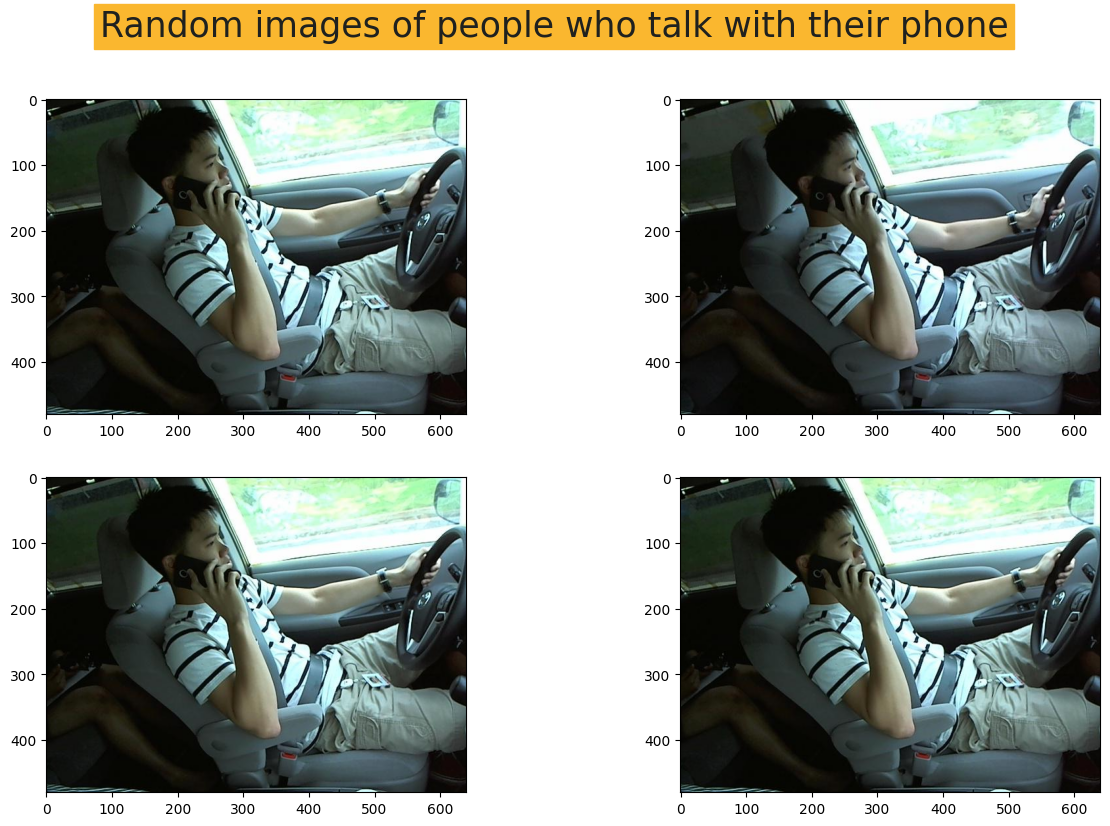

In [ ]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):

    n += 1
    random_img = random.choice(image_list_talking)
    imgs = imread(random_img)
    plt.suptitle("Random images of people who talk with their phone",
                 fontdict = font, fontsize=25
                 ,backgroundcolor= background_color)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

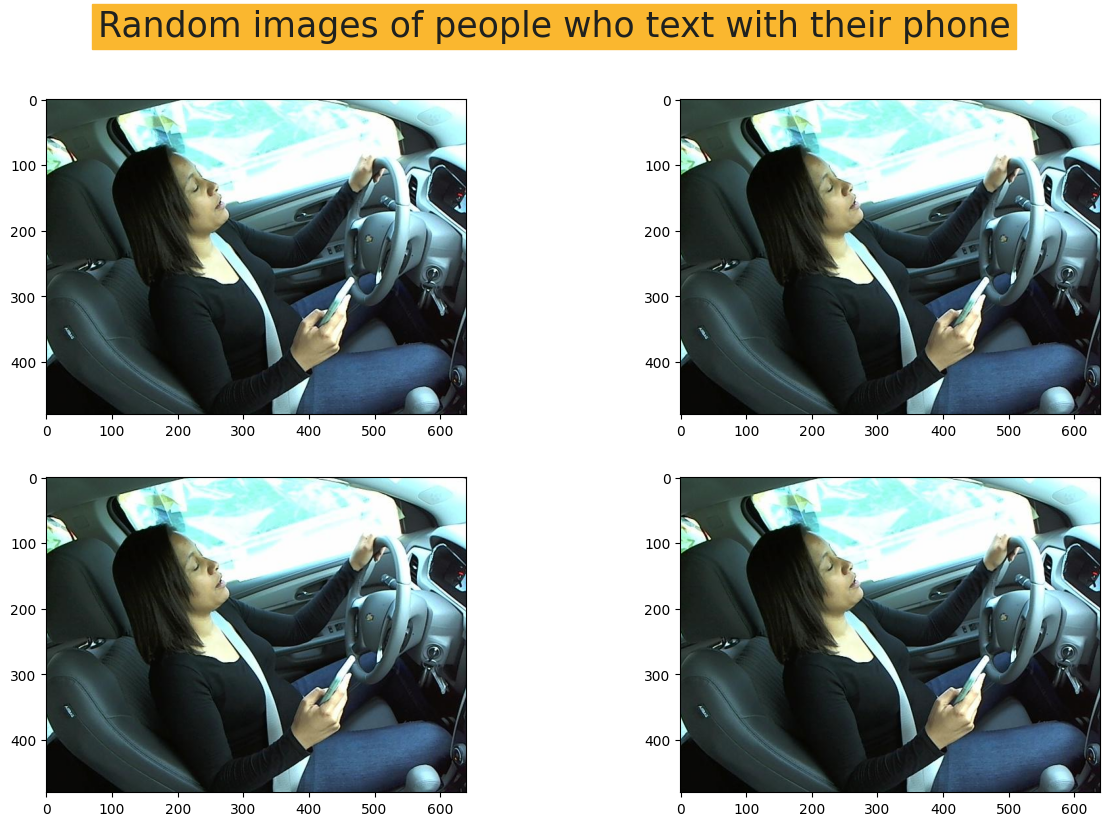

In [ ]:
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):

    n += 1
    random_img = random.choice(image_list_text)
    imgs = imread(random_img)
    plt.suptitle("Random images of people who text with their phone",
                 fontdict = font, fontsize=25
                 ,backgroundcolor=background_color)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

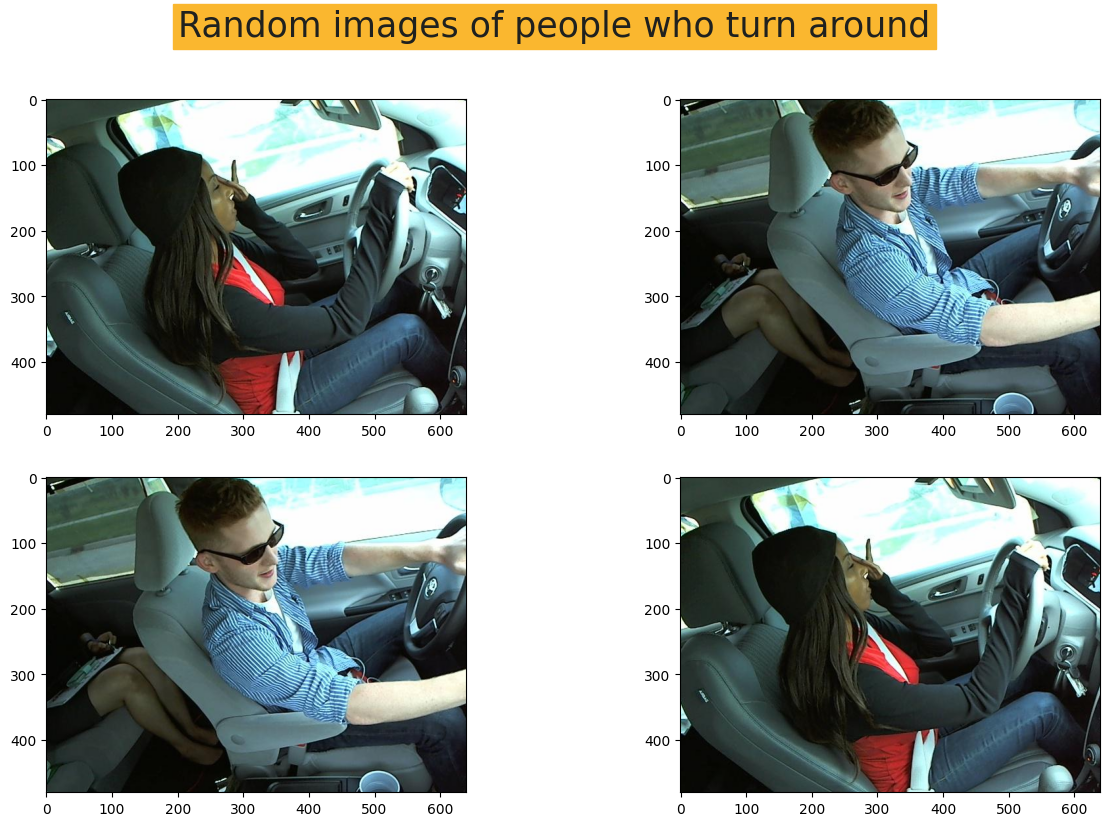

In [ ]:
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):

    n += 1
    random_img = random.choice(image_list_turn)
    imgs = imread(random_img)
    plt.suptitle("Random images of people who turn around",
                 fontdict = font, fontsize=25
                 ,backgroundcolor=background_color)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

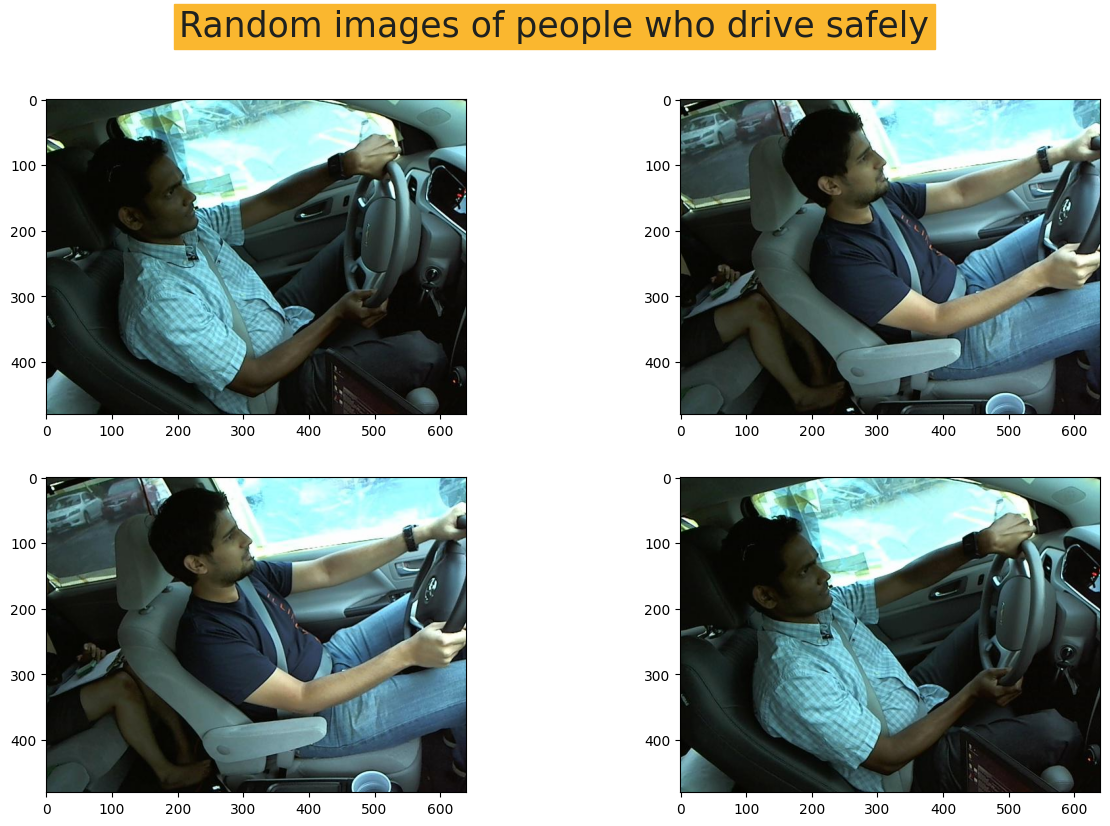

In [ ]:
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):

    n += 1
    random_img = random.choice(image_list_safe)
    imgs = imread(random_img)
    plt.suptitle("Random images of people who drive safely",
                 fontdict = font, fontsize=25
                 ,backgroundcolor=background_color)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

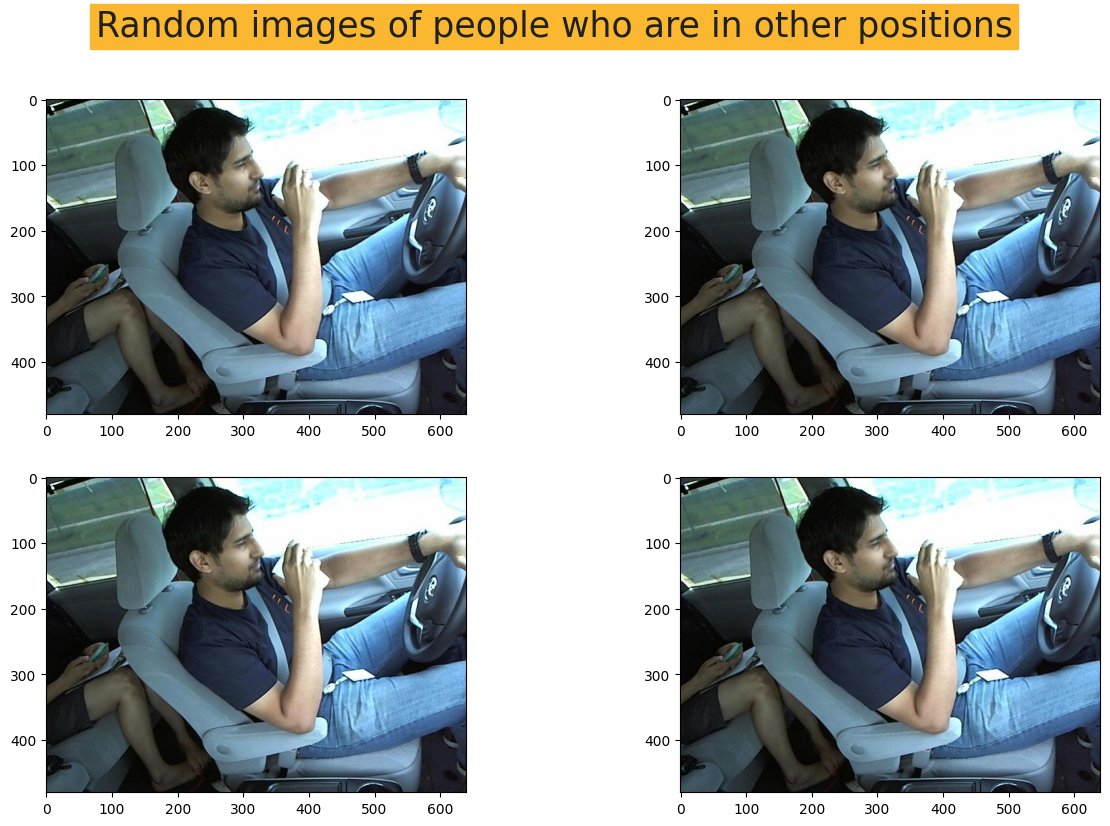

In [ ]:
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):

    n += 1
    random_img = random.choice(image_list_other)
    imgs = imread(random_img)
    plt.suptitle("Random images of people who are in other positions",
                 fontdict = font, fontsize=25
                 ,backgroundcolor=background_color)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

3. Split data to train, test, prediction

I deciede to devide dataset in this situation: 1- train = 75%, 2- test = 15% and 3- valid = 5%

In [ ]:
print("Number of samples in (Class = Other) = " ,len(image_list_other))
print("Number of samples in (Class = Safe Driving) = " ,len(image_list_safe))
print("Number of samples in (Class = Talking Phone) = " ,len(image_list_talking))
print("Number of samples in (Class = Texting Phone) = " ,len(image_list_text))
print("Number of samples in (Class = Turning) = " ,len(image_list_turn))

Number of samples in (Class = Other) =  2
Number of samples in (Class = Safe Driving) =  2
Number of samples in (Class = Talking Phone) =  2
Number of samples in (Class = Texting Phone) =  2
Number of samples in (Class = Turning) =  2


In [ ]:
print(.75*len(image_list_other) , .2*len(image_list_other) ,.05*len(image_list_other))
print(.75*len(image_list_safe) , .2*len(image_list_safe) ,.05*len(image_list_safe))
print(.75*len(image_list_talking) , .2*len(image_list_talking) ,.05*len(image_list_talking))
print(.75*len(image_list_text) , .2*len(image_list_text) ,.05*len(image_list_text))
print(.75*len(image_list_turn) , .2*len(image_list_turn) ,.05*len(image_list_turn))

1.5 0.4 0.1
1.5 0.4 0.1
1.5 0.4 0.1
1.5 0.4 0.1
1.5 0.4 0.1


In [ ]:
print("Train","Test", "Valid")

train_other = image_list_other[:1589]
test_other = image_list_other[1589:2012]
valid_other = image_list_other[2012:]

print (len(train_other), len(test_other), len(valid_other))

train_safe = image_list_safe[:1652]
test_safe = image_list_safe[1652:2092]
valid_safe = image_list_safe[2092:]

print (len(train_safe), len(test_safe), len(valid_safe))

train_talking = image_list_talking[:1626]
test_talking = image_list_talking[1626:2059]
valid_talking = image_list_talking[2059:]

print (len(train_talking), len(test_talking), len(valid_talking))

train_text = image_list_text[:1652]
test_text = image_list_text[1652:2092]
valid_text = image_list_text[2092:]

print (len(train_text), len(test_text), len(valid_text))

train_turn = image_list_turn[:1547]
test_turn = image_list_turn[1547:1959]
valid_turn = image_list_turn[1959:]

print (len(train_turn), len(test_turn), len(valid_turn))

Train Test Valid
2 0 0
2 0 0
2 0 0
2 0 0
2 0 0


4. Create dataframes for train, test, prediction

If you don't want to use directly from the directories and you want to create some lists of images, you can turn the format of data to dataframes and use flow from dataframe method that we see in the next cells. For this approach, create a label column for use it as a tag or label

In [ ]:
train_other_df = pd.DataFrame({'image':train_other, 'label':'Other'})
train_safe_df = pd.DataFrame({'image':train_safe, 'label':'Safe'})
train_talking_df = pd.DataFrame({'image':train_talking, 'label':'Talk'})
train_text_df = pd.DataFrame({'image':train_text, 'label':'Text'})
train_turn_df = pd.DataFrame({'image':train_turn, 'label':'Turn'})

In [ ]:
test_other_df = pd.DataFrame({'image':test_other, 'label':'Other'})
test_safe_df = pd.DataFrame({'image':test_safe, 'label':'Safe'})
test_talking_df = pd.DataFrame({'image':test_talking, 'label':'Talk'})
test_text_df = pd.DataFrame({'image':test_text, 'label':'Text'})
test_turn_df = pd.DataFrame({'image':test_turn, 'label':'Turn'})

In [ ]:
valid_other_df = pd.DataFrame({'image':valid_other, 'label':'Other'})
valid_safe_df = pd.DataFrame({'image':valid_safe, 'label':'Safe'})
valid_talking_df = pd.DataFrame({'image':valid_talking, 'label':'Talk'})
valid_text_df = pd.DataFrame({'image':valid_text, 'label':'Text'})
valid_turn_df = pd.DataFrame({'image':valid_turn, 'label':'Turn'})

In [ ]:
train_df = pd.concat([train_other_df, train_safe_df, train_talking_df, train_text_df, train_turn_df])
test_df = pd.concat([test_other_df, test_safe_df, test_talking_df, test_text_df, test_turn_df])
val_df = pd.concat([valid_other_df, valid_safe_df, valid_talking_df, valid_text_df, valid_turn_df])

In [ ]:
train_df.head()

image  label
0    /content/img_993.jpg  Other
1    /content/img_971.jpg  Other
0  /content/img_99194.jpg   Safe
1   /content/img_9967.jpg   Safe
0     /content/img_94.jpg   Talk

In [ ]:
print("Number of rows in train dataframe is: ", len(train_df))
print("Number of rows in test dataframe is: ", len(test_df))
print("Number of rows in val dataframe is: ", len(val_df))

Number of rows in train dataframe is:  10
Number of rows in test dataframe is:  0
Number of rows in val dataframe is:  0


5. Calculate the ratio of images

It's really important in some cases for knowing the ratio of images that we use. We can use cv2.imread for this part.

In [ ]:
random_img_height = random.choice(train_other)

In [ ]:
image= cv2.imread(random_img_height)

height, width= image.shape[:2]

print("The height is ", height)

print("The width is ", width)

The height is  480
The width is  640


6. Define hyperparameters

Some of the hyperparameters should be considering before the model goes to start. I set Batch size as 64, ofcourse you can use 32 or any other popular numbers or you can use some functions for checking the best number of that but it costs lots of run time and I just want to pick some experimental value. Also for AlexNet, ResNet and VGGNet its popular to use height and width as a 240*240 format.

In [ ]:
Batch_size = 64
Img_height = 240
Img_width = 240

7. Rescale the images

Its really important to rescale the images and put all of the images in a same shape for input layer of model.

In [ ]:
trainGenerator = ImageDataGenerator(rescale=1./255.)
valGenerator = ImageDataGenerator(rescale=1./255.)
testGenerator = ImageDataGenerator(rescale=1./255.)

In [ ]:
print(train_df.columns)
print(test_df.columns)
print(val_df.columns)


Index(['image', 'label'], dtype='object')
Index(['image', 'label'], dtype='object')
Index(['image', 'label'], dtype='object')


In [ ]:
print(train_df.head())
print(test_df.head())
print(val_df.head())


                    image  label
0    /content/img_993.jpg  Other
1    /content/img_971.jpg  Other
0  /content/img_99194.jpg   Safe
1   /content/img_9967.jpg   Safe
0     /content/img_94.jpg   Talk
Empty DataFrame
Columns: [image, label]
Index: []
Empty DataFrame
Columns: [image, label]
Index: []


8. Input Model

Now we can use flow from dataframe that mentioned before. It helps to call images from some dataframes and mention the label as target.

In [ ]:
trainDataset = trainGenerator.flow_from_dataframe(
  dataframe=train_df,
  class_mode="categorical",
  x_col="image",
  y_col="label",
  batch_size=Batch_size,
  seed=42,
  shuffle=True,
  target_size=(Img_height, Img_width)
)

testDataset = testGenerator.flow_from_dataframe(
  dataframe=test_df,
  class_mode='categorical',
  x_col="image",
  y_col="label",
  batch_size=Batch_size,
  seed=42,
  shuffle=True,
  target_size=(Img_height, Img_width)
)

valDataset = valGenerator.flow_from_dataframe(
  dataframe=val_df,
  class_mode='categorical',
  x_col="image",
  y_col="label",
  batch_size=Batch_size,
  seed=42,
  shuffle=True,
  target_size=(Img_height, Img_width)
)


Found 10 validated image filenames belonging to 5 classes.


KeyError: 'label'